# 1.) Pull in Data and Convert ot Monthly

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
apple_data = yf.download('AAPL')
df = apple_data.resample("M").last()[["Adj Close"]]

[*********************100%%**********************]  1 of 1 completed


# 2.) Create columns. 
  - Current Stock Price, Difference in stock price, Whether it went up or down over the next month,  option premium

In [3]:
df['Diff'] = df.diff().shift(-1)
df['Target'] = np.sign(df['Diff'])
df['Premium'] = .08 * df["Adj Close"]
df.head()

,Adj Close,Diff,Target,Premium
Date,,,,
1980-12-31,0.117887,-0.020296,-1.0,0.009431
1981-01-31,0.097592,-0.006045,-1.0,0.007807
1981-02-28,0.091546,-0.006909,-1.0,0.007324
1981-03-31,0.084637,0.013386,1.0,0.006771
1981-04-30,0.098023,0.016409,1.0,0.007842


# 3.) Pull in X data, normalize and build a LogReg on column 2

In [4]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [5]:
X = pd.read_csv("Xdata.csv", index_col="Date", parse_dates=["Date"])

In [6]:
y = df.loc[:"2023-09-30","Target"].copy()
df = df.loc[:"2023-09-30",:].copy()

In [7]:
logreg = LogisticRegression()
logreg.fit(X,y)
y_pred = logreg.predict(X)

# 4.) Add columns, prediction and profits.

In [8]:
df['Predictions'] = y_pred

In [10]:
df['Profits'] = 0.

# True Positives
df.loc[(df['Predictions'] == 1) & (df['Target'] == 1), "Profits"] = df["Premium"]
# False Positive
df.loc[(df['Predictions'] == 1) & (df['Target'] == -1), "Profits"] = 100 * df['Diff'] + df["Premium"]

# 5.) Plot profits over time

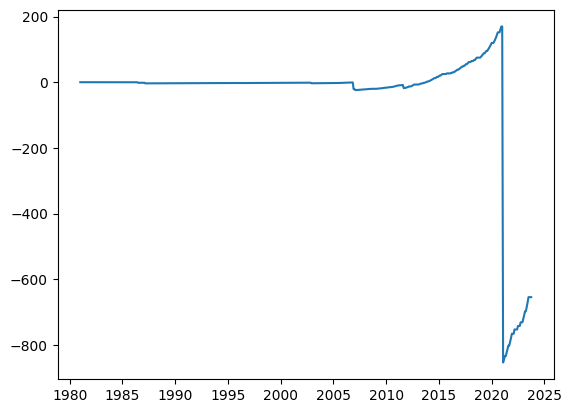

In [11]:
plt.plot(np.cumsum(df['Profits']))
plt.show()

### 5.5
StarsArena is a realcworld example of how blockchain technology is being used in innovative ways. It can also offer insights into the practical applications of data science in the field of social media and content monetization. Data science can be used to analyze the performance of content and optimize it based on user preferences, it can also help identify the most effective monetization strategies by analyzing user engagement with different types of content.

# 6.) Create a loop that stores total profits over time

# 7.) What is the optimal threshold and plot the total profits for this model.